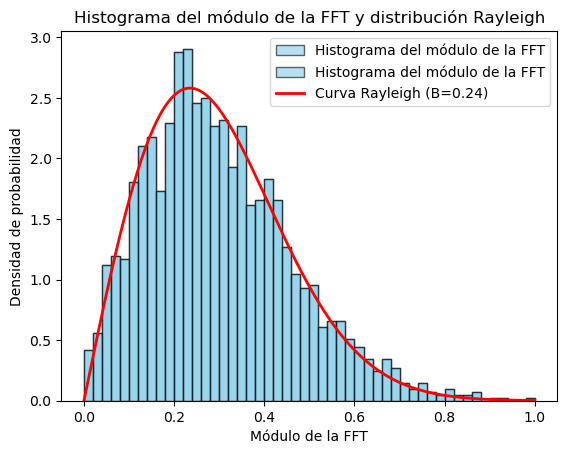

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rayleigh


N= 4096  # Cantidad de muestras
a = -0.06572049000128
b = -0.9012327

B = np.exp(a * np.log(N) + b)
# Calcular B usando la fórmula

media = 0  # Media del ruido
varianza = 1  # Varianza del ruido

# Generar datos AWGN
datos_awgn = np.random.normal(loc=media, scale=np.sqrt(varianza), size=N)
fft_datos = np.fft.fft(datos_awgn)
modulo_fft = np.abs(fft_datos)
modulo_fft_normalizados = (modulo_fft - modulo_fft.min()) / (modulo_fft.max() - modulo_fft.min())

#Datos 2

datos_awgn2 = np.random.normal(loc=media, scale=np.sqrt(varianza), size=N)
fft_datos2 = np.fft.fft(datos_awgn2)
modulo_fft2 = np.abs(fft_datos2)
modulo_fft_normalizados2 = (modulo_fft2 - modulo_fft2.min()) / (modulo_fft2.max() - modulo_fft2.min())
# Estimar el parámetro B para la distribución Rayleigh
#B = np.sqrt(np.mean(modulo_fft**2) / 2)
desplazo=1
modulo_fft_normalizados2 =  np.roll(modulo_fft_normalizados, desplazo)

# Graficar el histograma del módulo de la FFT
plt.hist(modulo_fft_normalizados, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Histograma del módulo de la FFT')
plt.hist(modulo_fft_normalizados2, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Histograma del módulo de la FFT')
# Crear la curva de la distribución Rayleigh
x = np.linspace(0, np.max(modulo_fft_normalizados), 1000)
rayleigh_pdf = rayleigh.pdf(x, scale=B)
plt.plot(x, rayleigh_pdf, 'r-', linewidth=2, label=f'Curva Rayleigh (B={B:.2f})')

# Etiquetas y leyenda
plt.xlabel('Módulo de la FFT')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Histograma del módulo de la FFT y distribución Rayleigh')
plt.legend()

# Mostrar el gráfico
plt.show()



In [8]:
print(modulo_fft_normalizados2[1:10])
print(modulo_fft_normalizados[1:10])

[0.18740205 0.65991374 0.19630493 0.16800139 0.35503338 0.17185179
 0.32941326 0.17823224 0.12512812]
[0.65991374 0.19630493 0.16800139 0.35503338 0.17185179 0.32941326
 0.17823224 0.12512812 0.511902  ]


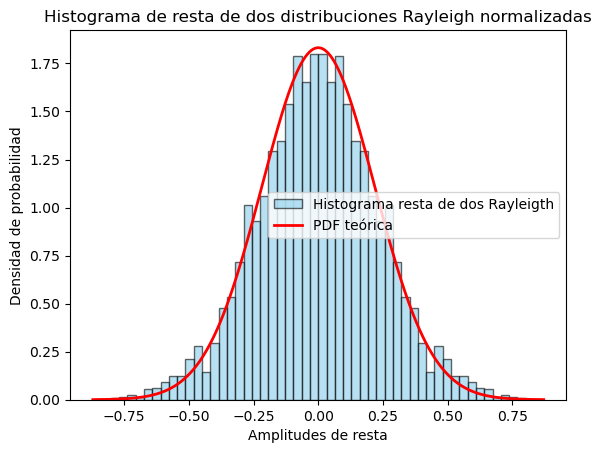

In [15]:
#RESTO LAS DOS RAYLEIGTH Y VERIFICO CON LA DISTRIBUCION TEORICA

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
datos_resta=modulo_fft_normalizados-modulo_fft_normalizados2
plt.hist(datos_resta, bins=50, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='Histograma resta de dos Rayleigth')

media = 0
# Parámetros


varianza = (4 - np.pi) * B**2
desviacion_estandar = np.sqrt(varianza)
x = np.linspace(media - 4*desviacion_estandar, media + 4*desviacion_estandar, 1000)
pdf_teorica = stats.norm.pdf(x, loc=media, scale=desviacion_estandar)
plt.plot(x, pdf_teorica, 'r-', linewidth=2, label='PDF teórica')

# Etiquetas y leyenda
plt.xlabel('Amplitudes de resta')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Histograma de resta de dos distribuciones Rayleigh normalizadas')
plt.legend()

# Mostrar el gráfico
plt.show()

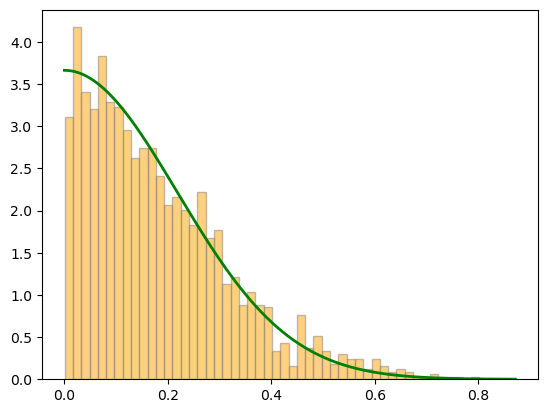

In [16]:
#APLICO VALOR ABSOLUTO

datos_abs = np.abs(datos_resta)
plt.hist(datos_abs, bins=50, density=True, alpha=0.5, color='orange', edgecolor='gray', label='Histograma de |datos| (Half-Normal)')

media = 0
varianza = (4 - np.pi) * B**2
desviacion_estandar = np.sqrt(varianza)
# Crear la curva de densidad teórica para la distribución half-normal
x_abs = np.linspace(0, 4*desviacion_estandar, 1000)
pdf_half_normal = stats.halfnorm.pdf(x_abs, scale=desviacion_estandar)
plt.plot(x_abs, pdf_half_normal, 'g-', linewidth=2, label='PDF teórica (Half-Normal)')

In [17]:
#CALCULO AREA DE LA HALF NORMAL DE 0 A E ES LA PROB DE 1, DE E A INFINITO ES LA PROB DE 0

from scipy.stats import halfnorm
import numpy as np
from scipy.stats import norm
E=0.3

#print(f"El área bajo la curva de la distribución half-normal desde 0 hasta {E} es: {area:.4f}")
PG1 = stats.norm.cdf(E / desviacion_estandar)

PG0=1-PG1
# Imprimir el resultado del área
print(f"PG0: {PG0}")
print(f"PG1: {PG1}")

PG0: 0.08418405679457885
PG1: 0.9158159432054211


In [18]:
PFA=0.023
MeanSPR=(PG1**3+2*PG1**2*PG0)/(PG1**2*PG0)
VarSPG=0.5*(PG1**3+4*PG1**2*PG0-(PG1**3+4*PG1**2*PG0)**2+PG1**2*PG0-(PG1**2*PG0)**2)**2
print(f"Mean SPR: {MeanSPR}")
print(f"Varianza SPG: {VarSPG}")

# Calcula la inversa de la función de distribución acumulada (Q^-1(a))
Q_inv = norm.ppf(PFA)

print(f"Q^-1({PFA}) = {Q_inv}")

UmbralSPR=Q_inv * VarSPG + MeanSPR
print(f"Umbra SPR= {UmbralSPR}")

Mean SPR: 12.878733789702522
Varianza SPG: 7.847707001648164e-05
Q^-1(0.023) = -1.9953933101678247
Umbra SPR= 12.87857719708201
